<a href="https://colab.research.google.com/github/kiran2424/hotel-booking-data-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

1.   When the best time of year to book a hotel room?
2.   What is the optimal length of stay in order to get the best daily rate?
3.   What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?
4.   Which hotel is more booked city or resort?
5.   In which month max booking has happened

a) All hotel type combined with years
b) Combined years with different hotel type
6. Top 10 countries who has max booking
7. Which hotel is more cancelled (rate)
8. For how long people stay in hotel?
9. Customer type?


1.   When the best time of year to book a hotel room? - **Done**
2.   What is the optimal length of stay in order to get the best daily rate?
3.   What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? - **Done**
4.   Which hotel is more booked city or resort? - **Done**
5.   In which month max booking has happened - **Done**

a) All hotel type combined with years - **Done**

b) Combined years with different hotel type - **Done**
6. Top 10 countries who has max booking - **Done**
7. Which hotel is more cancelled (rate) - **Done**
9. Customer type? - **Done**
8. For how long people stay in hotel?
10. Relationship between room changed and cancellation - **Done**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone P1 - EDA/Hotel_Bookings.csv')

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df_data.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.2,0,2,Check-Out,2017-09-07


In [6]:
df_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Here three columns has null values i.e. country,agent and company. So here we can drop agent and company because it is not needed and in country we can put 'no value' in empty places.


In [7]:
df_data['country'].fillna('no value',inplace=True)

In [8]:
df_data['country'].shape

(119390,)

In [9]:
df_data.drop(['agent','company'],axis=1,inplace=True)

In [10]:
df_data.shape

(119390, 30)

So we have cleaned the the data 

Now lets see type of hotes and its total numbers from the column of hotel

In [11]:
df_data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Now lets visualize it with pie chart 

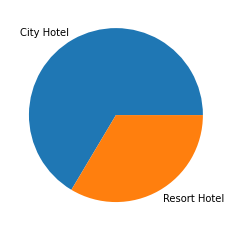

In [12]:
a=df_data['hotel'].value_counts()
plt.pie(a,labels=['City Hotel','Resort Hotel'])
plt.show()

Here as we can see city hotels are more booked in compare to resort hotels

Now lets see which type of customers are booking hotels

In [13]:
df_data['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
#df_data.groupby(['hotel'])['customer_type'].value_counts()

So the maximum customer type is Transient which means these are the customer who are living for short period of time

In [14]:
#extra done use it if needed
b=df_data['is_canceled'].value_counts()
b

0    75166
1    44224
Name: is_canceled, dtype: int64

In [15]:
# total percentage of cancelled vs booked
b[1]/(b[0]+b[1])*100

37.041628277075134

so 37% total room cancelled

In [16]:
c=df_data.groupby(['hotel'])['is_canceled'].value_counts()
c

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

In [19]:
# city cancelled
(c[1])/(c[0]+c[1])*100

41.72696331778646

In [20]:
# Resort cancelled
c[3]/(c[2]+c[3])*100

27.763354967548675

Lets plot above

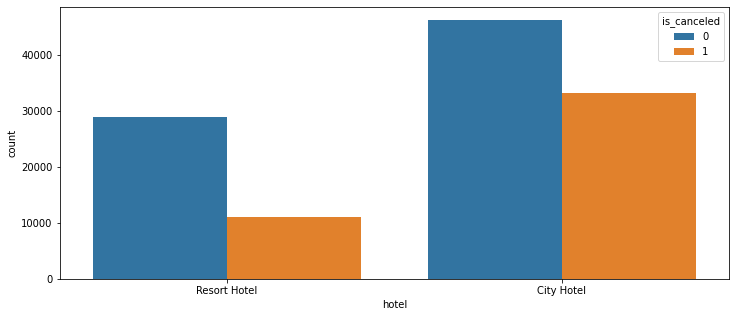

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='hotel', hue = 'is_canceled', data= df_data)
plt.show()

City hotel has max cancellation and resort hotel are getting less cancelled compared to city

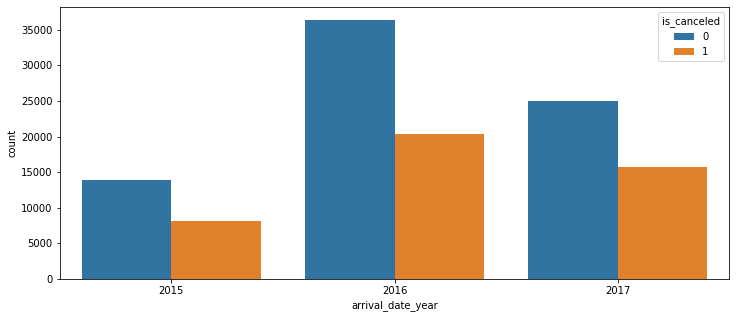

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year', hue = 'is_canceled', data = df_data)
plt.show()

In 2016 max booking was cancelled

5.   In which month max booking has happened

a) All hotel type combined with years
b) Combined years with different hotel type

In [22]:
k=df_data['arrival_date_month'].value_counts()
k

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


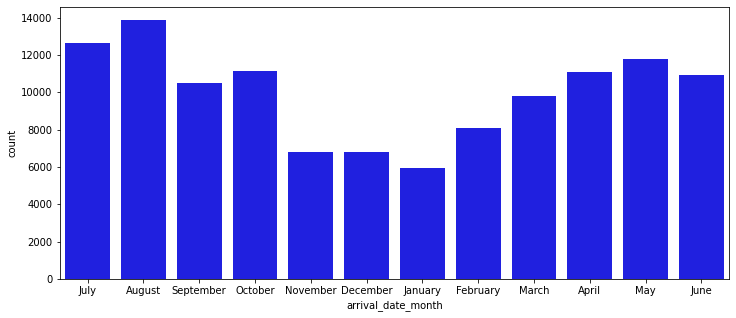

In [23]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(df_data['arrival_date_month'],color='b')
plt.show()

So August has highest number of bookings. This include both resort and city hotels

Lets see resort and city differently

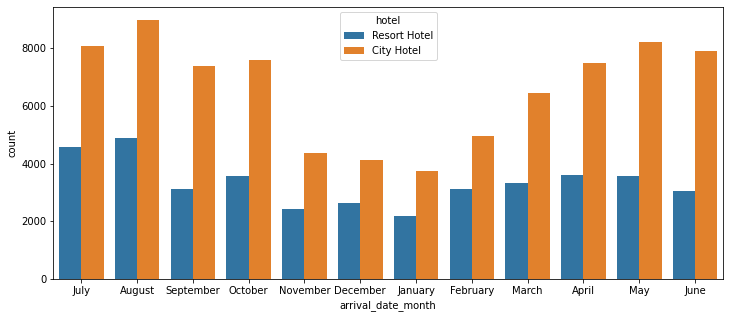

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df_data)
plt.show()

So resort and city both hotels has highest number of bookings in August month



No lets see which year has highest bookings

In [25]:
df_data['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


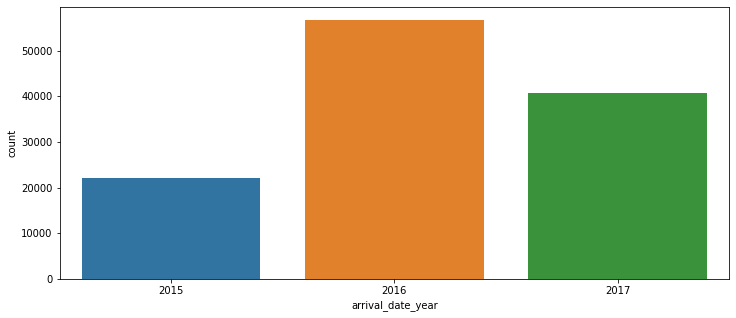

In [26]:
#df_data['arrival_date_year'].value_counts().plot(kind='bar')
sns.countplot(df_data['arrival_date_year'])

So max booking was in 2016 which include both reort and city hotels


Now lets see resort and city hotels differently in each year

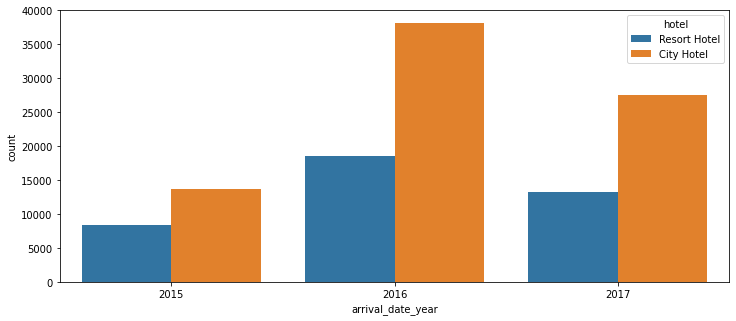

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year', hue = 'hotel', data= df_data)
plt.show()

So resort and city both hotels has highest number of bookings in 2016


Now lets see the top 10 countries who has max booking


In [42]:
df_data['country'].value_counts().head(10)


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Creating dataframe of above top 10

In [43]:
top_ten = df_data[df_data['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD"])]

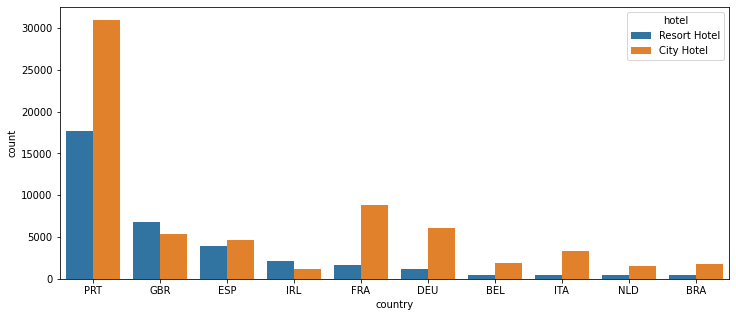

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(x='country', hue = 'hotel', data = top_ten)
plt.show()

portugal has max booking in resort as well as city hotel

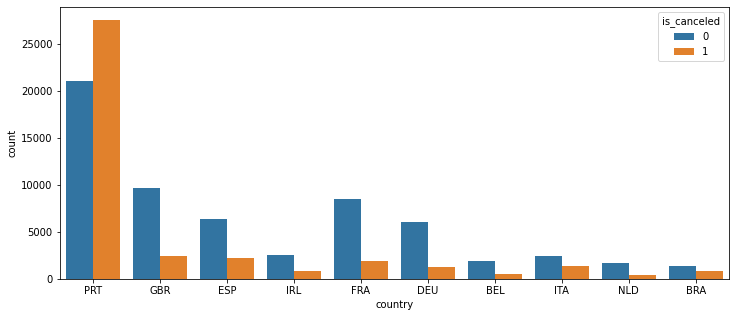

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(x='country', hue = 'is_canceled', data = top_ten)
plt.show()

So portugal has max cancellation aslo

Now lets see the relationship between room changed and cancellation

In [50]:
df_data['assigned_same_room'] = df_data['reserved_room_type']==df_data['assigned_room_type']
df_data['assigned_same_room']

0          True
1          True
2         False
3          True
4          True
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Name: assigned_same_room, Length: 119390, dtype: bool

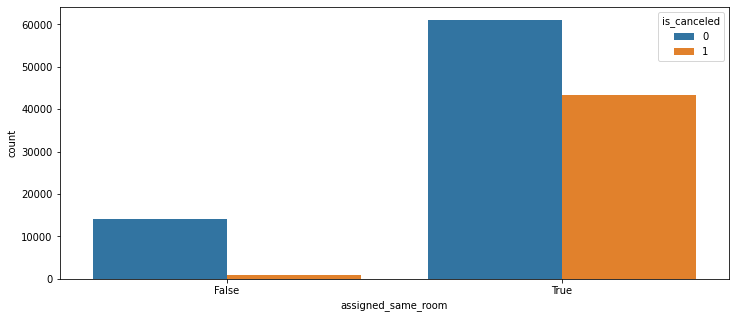

In [51]:
plt.figure(figsize=(12,5))
sns.countplot(x='assigned_same_room', hue = 'is_canceled', data = df_data)
plt.show()

Customer who has changed room type has cancellation more (write description later on)

What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

In [61]:
df_data.groupby(['total_of_special_requests'])['hotel'].value_counts()


total_of_special_requests  hotel       
0                          City Hotel      47957
                           Resort Hotel    22361
1                          City Hotel      21420
                           Resort Hotel    11806
2                          City Hotel       8142
                           Resort Hotel     4827
3                          City Hotel       1587
                           Resort Hotel      910
4                          City Hotel        198
                           Resort Hotel      142
5                          City Hotel         26
                           Resort Hotel       14
Name: hotel, dtype: int64

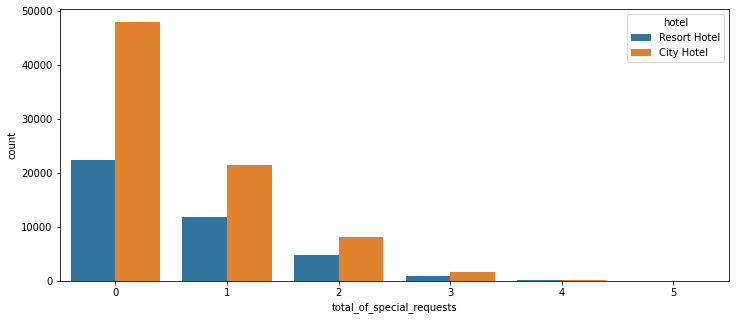

In [62]:
plt.figure(figsize=(12,5))
sns.countplot(x='total_of_special_requests', hue = 'hotel', data = df_data)
plt.show()

So the probability of 0 special guest is highest